<a href="https://colab.research.google.com/github/dhairyachandra/Module-1-Deep-Learning-ICP/blob/master/Pretrained_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')
myPath = '/content/drive/My Drive/Data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import torch
from torchvision import models, transforms, datasets

In [4]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:06<00:00, 35197921.07it/s]


In [5]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

In [0]:
transform = transforms.Compose([transforms.Resize(224), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [8]:
train_dataset = datasets.CIFAR10(myPath, train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)


Files already downloaded and verified


In [13]:
dataiter = next(iter(train_loader))
images, labels = dataiter
images.shape

torch.Size([64, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


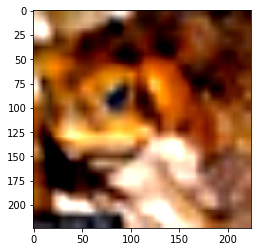

Label: 6
Class: frog


In [24]:
# Visualize some of the data objects...

import numpy 
import matplotlib.pyplot as plt


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

def display_img(img):
  plt.imshow(convert_to_imshow_format(img))
  plt.show()

display_img(images[0])

print('Label:', labels[0].item()) 

##notice we know the labels, but not the actual name of the class.. This you need to know manually


# now we can print the name of the class of the above picture

print(f'Class: {classes[labels[0].item()]}')

In [21]:
# let's downaload the classes of AlexNet

with open('/content/drive/My Drive/Study/UMKC/imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]
  
print(f'There are a total of {len(classes)} classes\n')
print(f'A sample of the classes: \n {classes[0:3]}')

There are a total of 1000 classes

A sample of the classes: 
 ['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([64, 1000])


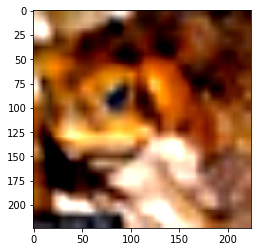

In [22]:
# let's make some predictions using the loaded model:

alexnet.eval()

predictions = alexnet(images)

print(predictions.shape)

display_img(images[0])

In [25]:
max_vlaue, max_index = torch.max(predictions, dim=1)

max_index.shape

torch.Size([64])

In [32]:
percentage = torch.nn.functional.softmax(predictions, dim=1)[0] * 100
print(percentage[max_index[0]].item())

21.16928482055664


In [35]:
print(classes[max_index[0]])



IndexError: ignored